**Customer Personality Analysis** is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib import colors
from matplotlib.colors import ListedColormap

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')
np.random.seed(42)

In [2]:
data= pd.read_csv('C:/Users/EmmalisaAmber/Downloads/marketing_campaign.csv', sep='\t')
print('Number of datapoints:', len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# About the Dataset #

**People**

*ID*: Customer's unique identifier

*Year_Birth*: Customer's birth year

*Education*: Customer's education level

*Marital_Status*: Customer's marital status

*Income*: Customer's yearly household income

*Kidhome*: Number of children in customer's household

*Teenhome*: Number of teenagers in customer's household

*Dt_Customer*: Date of customer's enrollment with the company

*Recency*: Number of days since customer's last purchase

*Complain*: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

*MntWines*: Amount spent on wine in last 2 years

*MntFruits*: Amount spent on fruits in last 2 years

*MntMeatProducts*: Amount spent on meat in last 2 years

*MntFishProducts*: Amount spent on fish in last 2 years

*MntSweetProducts*: Amount spent on sweets in last 2 years

*MntGoldProds*: Amount spent on gold in last 2 years

**Promotion**

*NumDealsPurchases*: Number of purchases made with a discount

*AcceptedCmp1*: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

*AcceptedCmp2*: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

*AcceptedCmp3*: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

*AcceptedCmp4*: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

*AcceptedCmp5*: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

*Response*: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

*NumWebPurchases*: Number of purchases made through the company’s website

*NumCatalogPurchases*: Number of purchases made using a catalogue

*NumStorePurchases*: Number of purchases made directly in stores

*NumWebVisitsMonth*: Number of visits to company’s website in the last month


## DATA CLEANING

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Insights

~ There are missing values in income

~ There are some categorical features in the data frame as some features are dytpe: object.

~ Dt_Customer that indicated the date a customer joined the database is not parsed as DateTime

In [4]:
# To Remove the NA values

data.dropna(inplace=True)
print('Total number of data_points after removing missing values are:', len(data))

Total number of data_points after removing missing values are: 2216


In [5]:
# To parse Dt_Customer as DateTime

data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'], format='mixed')
dates= []
for i in data['Dt_Customer']:
    i=i.date()
    dates.append(i)
    
print('The newest customer enrollment is', max(dates))
print('The oldest customer enrollment is', min(dates))

The newest customer enrollment is 2014-12-06
The oldest customer enrollment is 2012-01-08


In [6]:
#Created a feature 'Customer_For'
days=[]
d1= max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data['Customer_For'] = days
data['Customer_For'] = pd.to_numeric(data['Customer_For'], errors='coerce')

In [7]:
print('Total categories in the feature Marital_Status:\n', data['Marital_Status'].value_counts(),'\n')

print('Total categories in the feature Education:\n', data['Education'].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


**In the next bit, I will be performing the following steps to engineer some new features:**

~Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

~Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

~Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

~Create a feature "Children" to indicate total children in a household that is, kids and teenagers.

~To get further clarity of household, Creating feature indicating "Family_Size"

~Create a feature "Is_Parent" to indicate parenthood status

~Lastly, I will create three categories in the "Education" by simplifying its value counts.

~Dropping some of the redundant features

In [8]:
#Feature Engineering
#Age of customer today

data['Age'] = 2021 - data['Year_Birth']

#Total spendings of various items
data['Spent']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

#Deriving living situation by marital status 'Alone'
data['Living_With']= data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone','Single':'Alone'})

#Feature indicating total children living in the household
data['Children']=data['Kidhome']+data['Teenhome']

#Feature for total members i the household
data['Family_Size'] = data['Living_With'].replace({'Alone':1, 'Partner':2}) + data['Children']

#Feature pertaining parenthood
data['Is_Parent'] = np.where(data.Children > 0,1,0)

#Segmenting education levels in three groups
data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate','PhD':'Postgraduate'})

#For clarity
data = data.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

#Dropping some of the redundant features
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']

data =data.drop(to_drop, axis=1)


In [9]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


The above stats show some discrepancies in mean Income and Age and max Income and age.

Note that max-age is 128 years, As I calculated the age that would be today (i.e. 2021) and the data is old.

Let's take a look at the broader view of the data and plot some of the selected features.

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

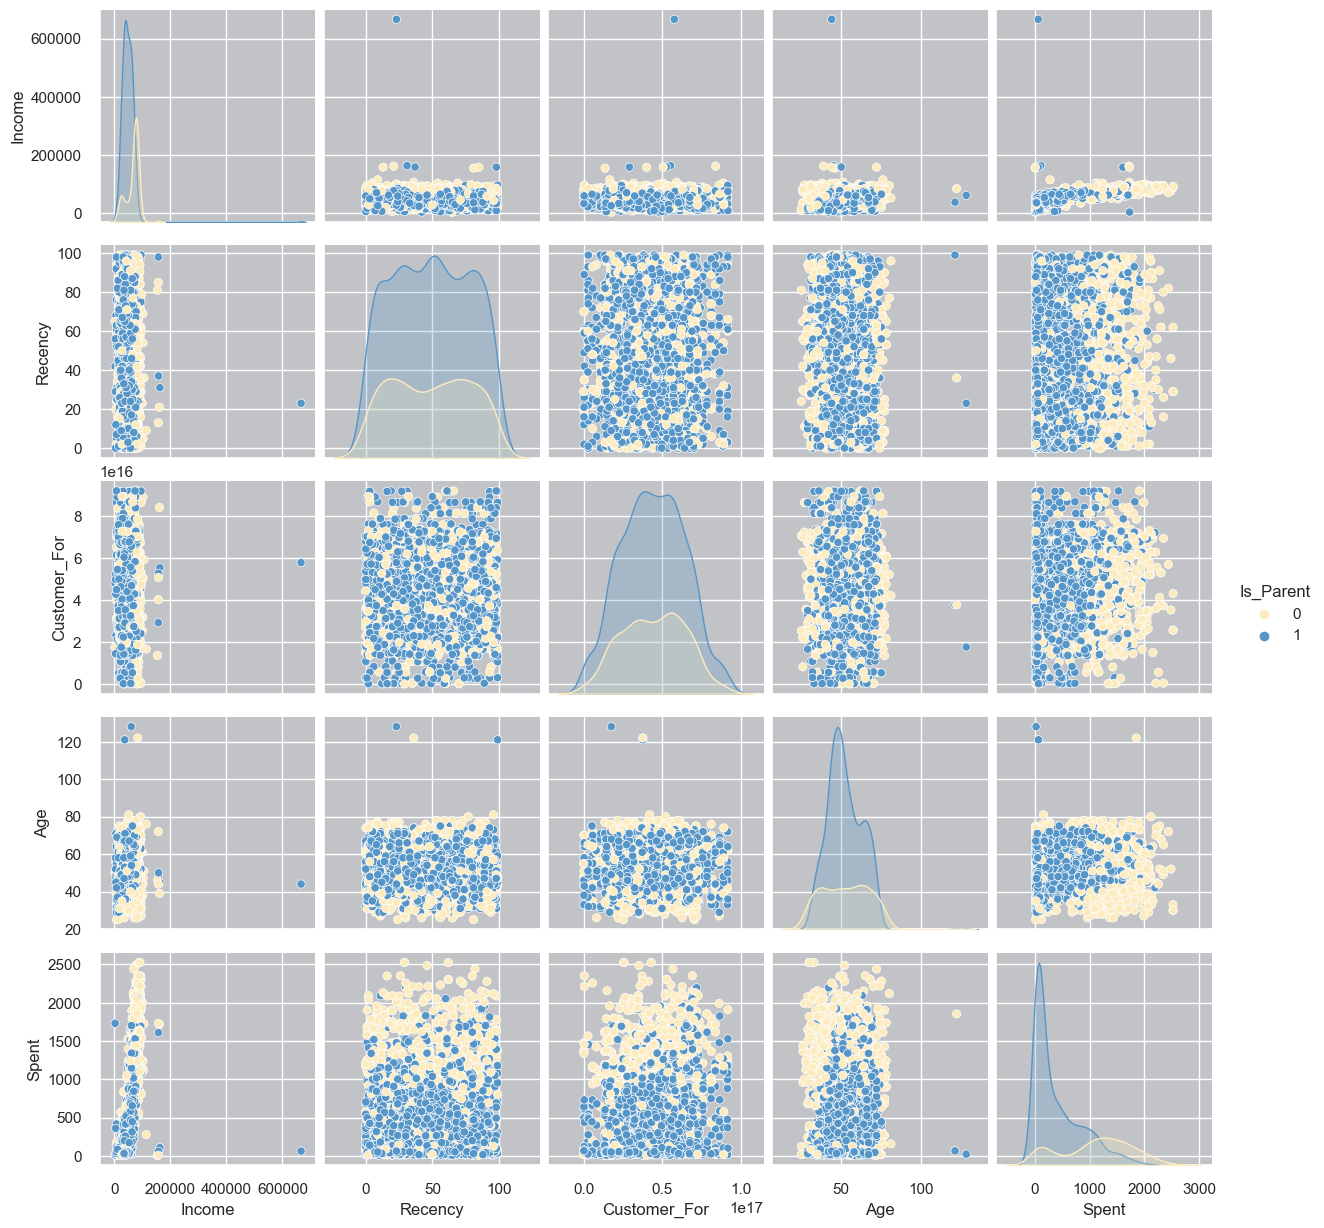

In [10]:
#To plot some selected features
#Setting u colors prefrences

sns.set(rc={'axes.facecolor':'#c2c3c7', 'figure.facecolor':'#ffffff'})
pallet = ['#fdebc0','#83769c', '#ed8a80', '#27464f','#80e5aa', '#ff97cf']
cmap = colors.ListedColormap(['#fdebc0','#83769c','#ed8a80','#27464f','#80e5aa','#5695c7'])

#Plotting following features
To_Plot = ['Income', 'Recency','Customer_For','Age','Spent','Is_Parent']
print('Relative Plot Of Some Selected Features: A Data Subset')
plt.figure()
sns.pairplot(data[To_Plot], hue= 'Is_Parent', palette=(['#fdebc0','#5695c7']))

#Taking hue
plt.show()

In [11]:
#Dropping the outliers by setting a cap on Age and income.

data= data[(data['Age']<90)]
data= data[(data['Income']<600000)]
print('The total number of data-points after removing the outliers are:', len(data))

The total number of data-points after removing the outliers are: 2212


We look at the correlation amongst the features next.

<Axes: >

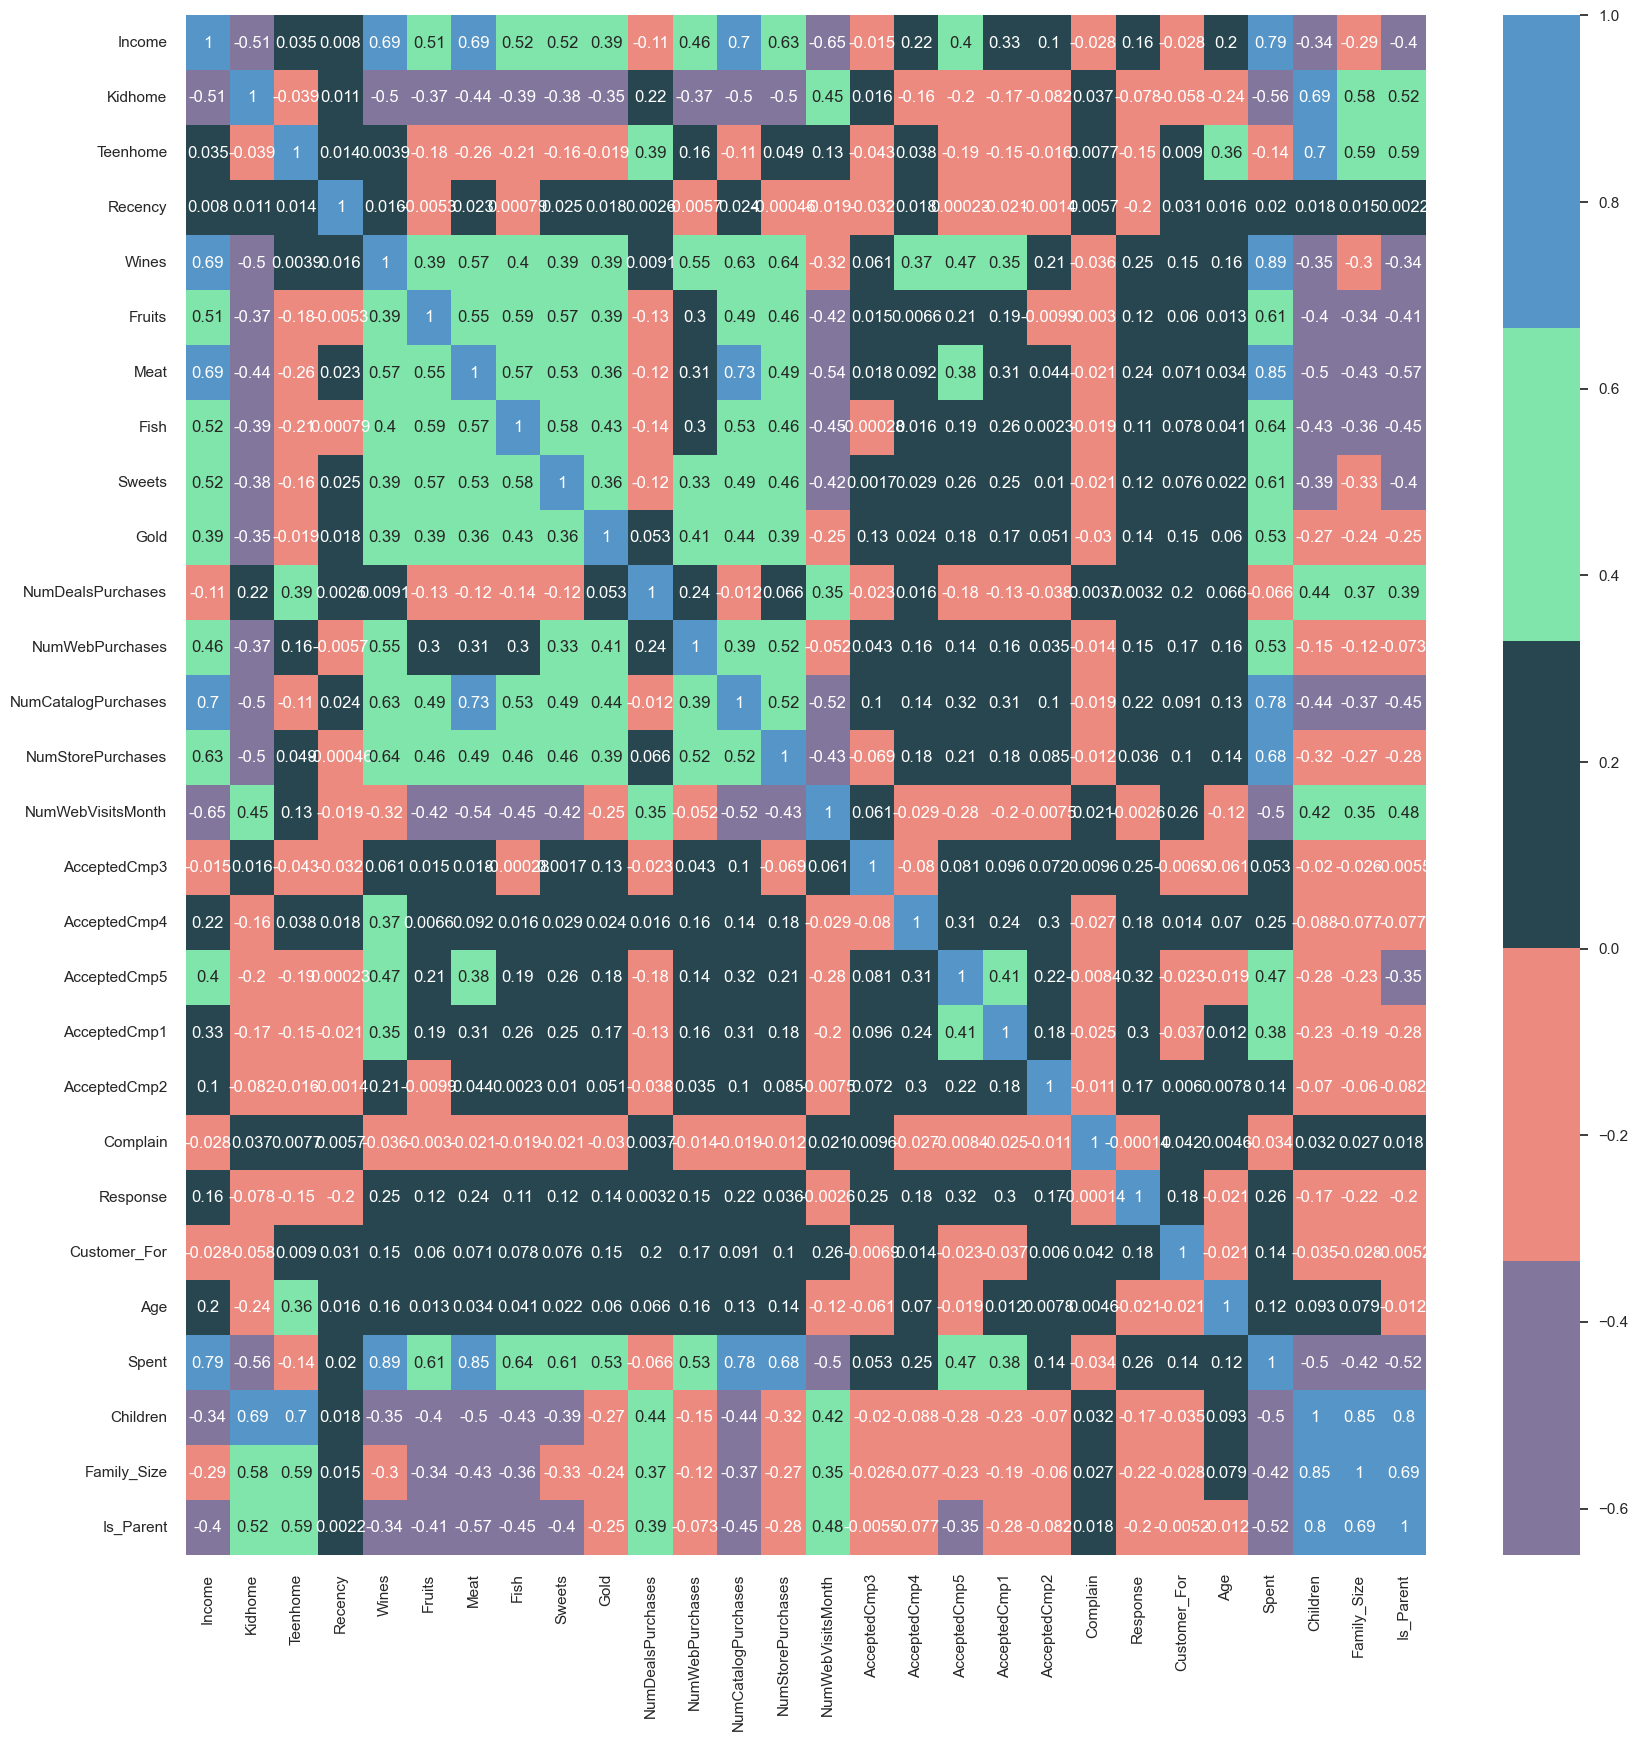

In [12]:
corrmat= data.corr(numeric_only=True)
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)

**DATA PREPROCESSING**

In this section, I will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data**

~Label ecoding the categorical features
~Scaling the features using the standard scaler
~Creating a subset dataframe for dimensionality reduction

In [15]:
#Get list of categorical variables

s = (data.dtypes == 'object')
object_cols =list(s[s].index)

print('Categorical variables inn the dataset:', object_cols)

Categorical variables inn the dataset: ['Education', 'Living_With']


In [16]:
#Label Encoding the object dtypes.

LE= LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print('All features are now numerical')

All features are now numerical


In [17]:
#Creating a copy of the data

ds =data.copy()
#Creating a subset of dataframe by dropping the features on deals accepted and promotions

cols_del =['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']

ds=ds.drop(cols_del, axis=1)
#Scaling
scaler =StandardScaler()
scaler.fit(ds)
scaled_ds=pd.DataFrame(scaler.transform(ds),columns=ds.columns)

print('All features are now scaled')

All features are now scaled


In [18]:
#Scaled data to be used for reducing the dimensionality

print('Dataframe to be used for further modelling')

scaled_ds.head()

Dataframe to be used for further modelling


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


## Dimensionality Reduction ##

In this problem, there are many factors on the basis of whoch the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why i will be perfoming dimensionality reduction on the selected features before putting them through a classifier.

*Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables*

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**

~Dimensionality reduction with PCA

~Plotiing the reduced dataframe

**Dimensionality reduction with PCA**

For this project i will be reducing the dimensions to 3

In [20]:
#Initiating PCA to reduce dimensions aka features to 3

pca =PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns =(['col1','col2','col3']))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-7.709324e-17,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,6.424437e-18,1.706839,-4.312196,-1.328316,-0.158123,1.242289,6.142721
col3,2212.0,2.007637e-17,1.221956,-3.530416,-0.829067,-0.022692,0.799895,6.611222


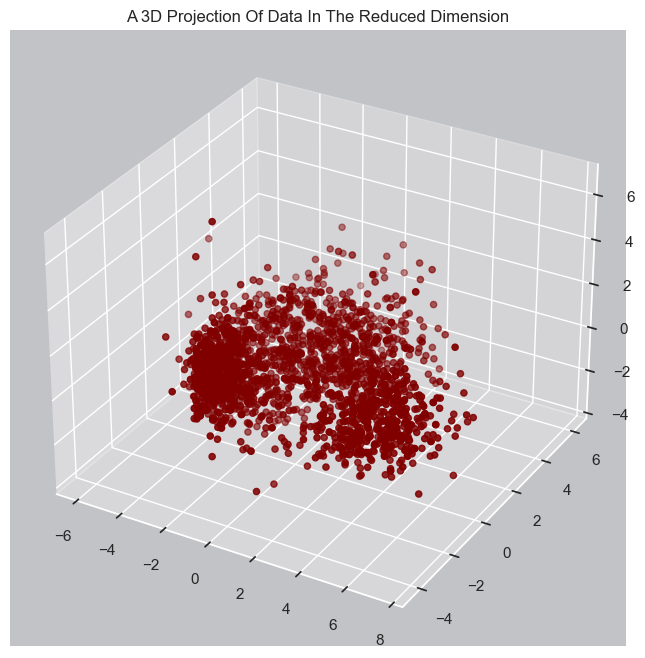

In [21]:
#A 3D Projection Of Data In The Reduced Dimension

x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

#To plot

fig = plt.figure(figsize=(10,8))
ax =fig.add_subplot(111, projection ='3d')
ax.scatter(x,y,z, c='maroon', marker='o')
ax.set_title('A 3D Projection Of Data In The Reduced Dimension')
plt.show()

# CLUSTERING #

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering.

**Agglomerative clustering** is a hierarchical clustering method. It involes merging examples until the desired number of clusters is achieved

**Steps involved in the Clustering**

~Elbow Method to determine the number of clusters to be formed

~Clustering via Agglomerative Clustering

~Examining the clusters formed via scatter plot

Elbow Method to determie the number of clusters to be formed:


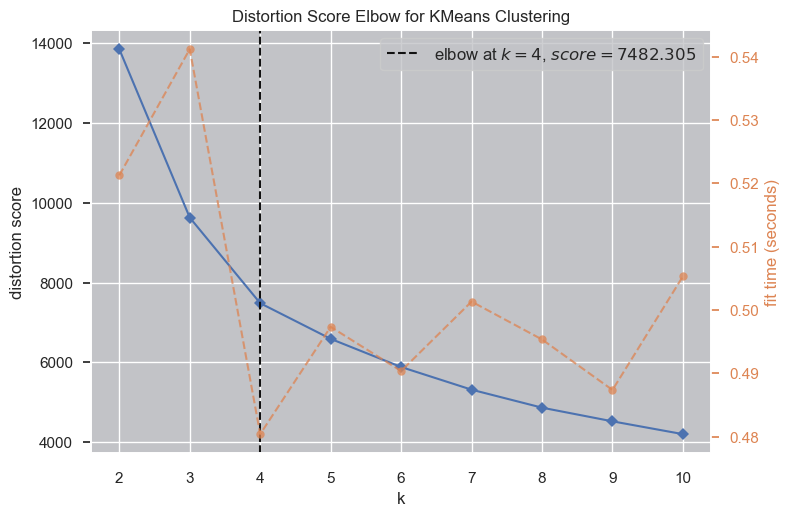

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
#Quick examinatio of elbow method to find number of clusters to make

print('Elbow Method to determie the number of clusters to be formed:')
Elbow_M =KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [24]:
#Initiating the Agglomerative Clustering model
AC =AgglomerativeClustering(n_clusters=4)

#fit model and predict clusters

yhat_AC =AC.fit_predict(PCA_ds)
PCA_ds['Clusters'] =yhat_AC

#Adding the Clusters feature to the original dataframe

data['Clusters'] =yhat_AC

To examine the clusters formed let's have a look at the 3D distribution of the clusters.

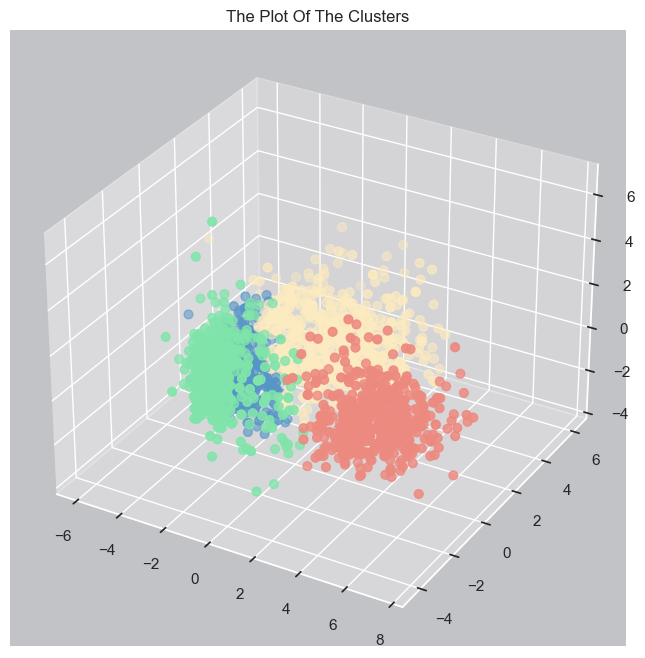

In [25]:
#Plotiing the clusters
fig =plt.figure(figsize=(10,8))
ax =plt.subplot(111, projection ='3d', label='bla')
ax.scatter(x,y,z, s=40, c=PCA_ds['Clusters'],marker='o', cmap=cmap)
ax.set_title('The Plot Of The Clusters')
plt.show()

# EVALUATING MODELS #

Since this is an unsupervised clustering, we do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be havig a look at the data in light of clusters via exploratory data analysis and drawing conclusions

**Firstly, let's have a look at the group distribution of clustering**

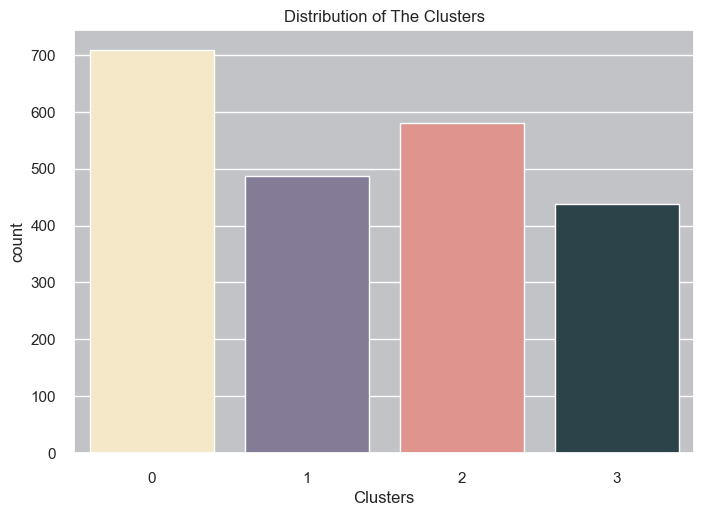

In [28]:
#Plotting countplot of clusters

pal =['#fdebc0','#83769c','#ed8a80','#27464f']
pl= sns.countplot(x=data['Clusters'], palette=pal)
pl.set_title('Distribution of The Clusters')
plt.show()

The clusters seem to be fairly distributed

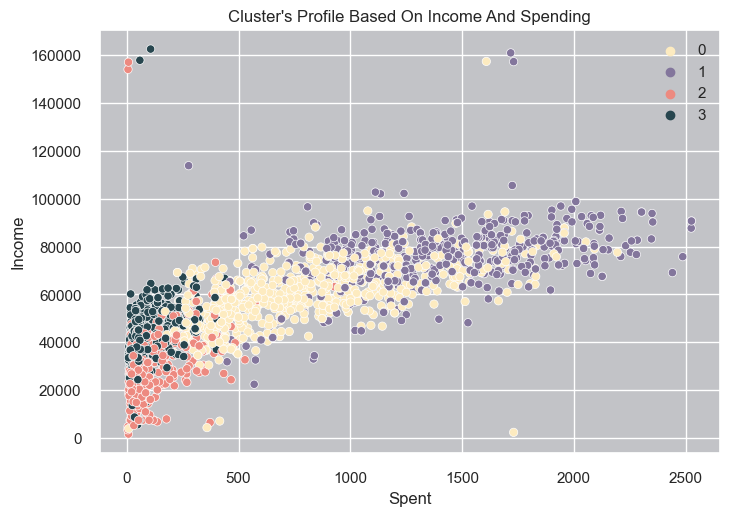

In [29]:
pl =sns.scatterplot(data=data, x=data['Spent'],y=data['Income'],hue=data['Clusters'], palette=pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**Income vs spending plot shows the clusters pattern**

~group 0: high spending & average income

~group 1: high spending & high income

~group 2: low spending & low income

~group 3: high spending & low income

Next, I will be looking at the detailed distribution of clusters as per various products in the data. Namely: WInes, Fruits, Meat, Fish, Sweets and Gold

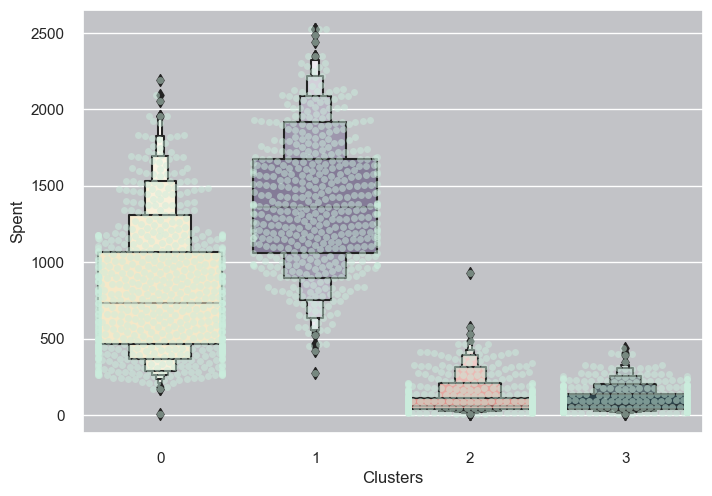

In [36]:
plt.figure()
pl =sns.swarmplot(x=data['Clusters'], y=data['Spent'], color ='#CBEDDD', alpha=0.5)
pl=sns.boxenplot(x=data['Clusters'], y=data['Spent'], palette=pal)
plt.show()

From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closelt followed by cluster 0. We can explore what each clsuter is spending on for the targeted marketing strategies.

Let us next explore how our campaigns did in the past

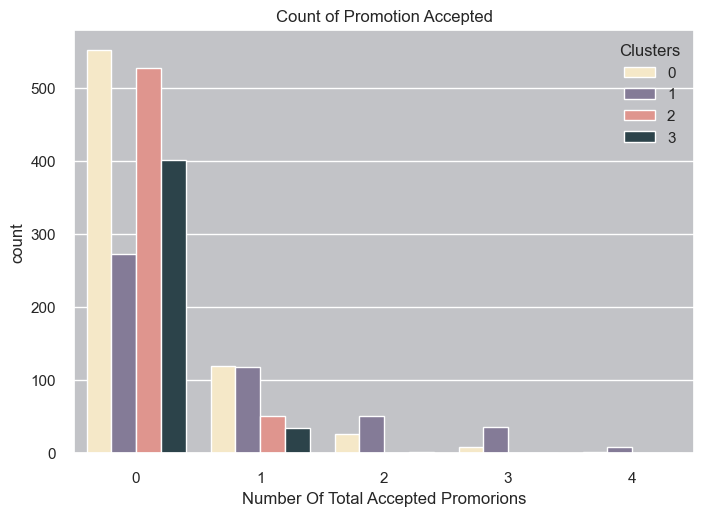

In [39]:
#Creating a feature to get a sum of accepted promotions

data['Total_Promos']= data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']

#Plotiig count of total campaign accepted.
plt.figure()
pl=sns.countplot(x=data['Total_Promos'], hue=data['Clusters'], palette=pal)
pl.set_title('Count of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promorions')
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one partakes in all 5 of them. Perhaps better_targeted and well_planned campaigns are required to boost sales.

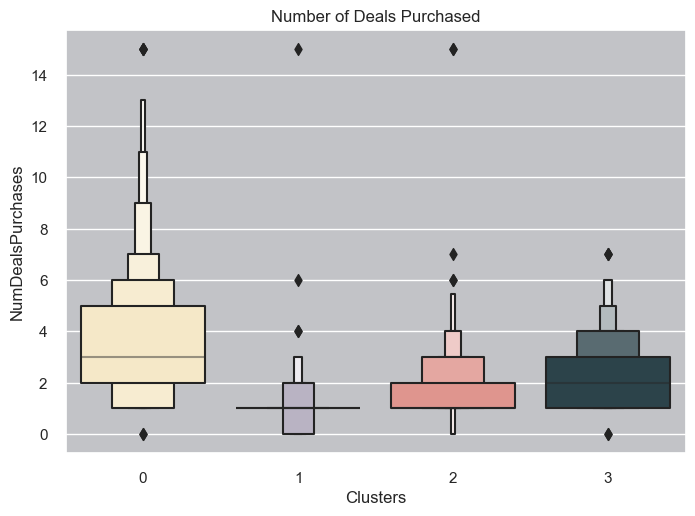

In [40]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data['NumDealsPurchases'], x=data['Clusters'], palette=pal)
pl.set_title('Number of Deals Purchased')
plt.show()

Unlike campaigns, the deals offred did well. It has best outcome with cluster 0 and cluster 3. Howver, our star customers cluster 1 are not much into the deals. Nothing seems to attract cluster 2 overwhelmingly

# PROFILING #

Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotiing some of the features that are indicative of the customer's personal traits in light of the vluster they are in. On the basis of the outcomes. I will be arriving at the conclusions.

<Figure size 800x550 with 0 Axes>

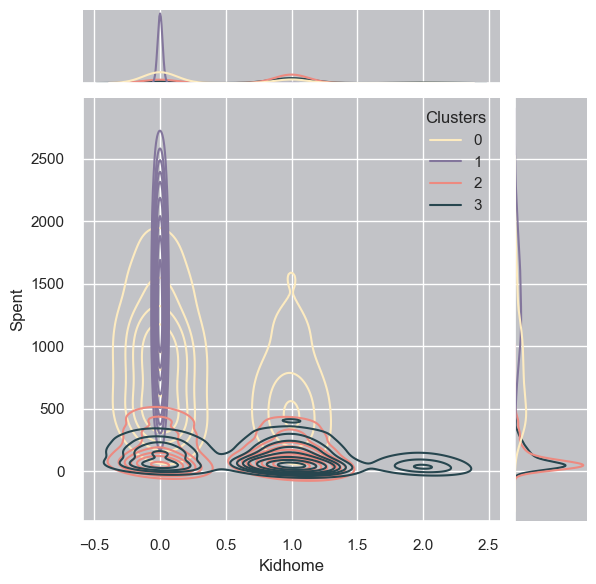

<Figure size 800x550 with 0 Axes>

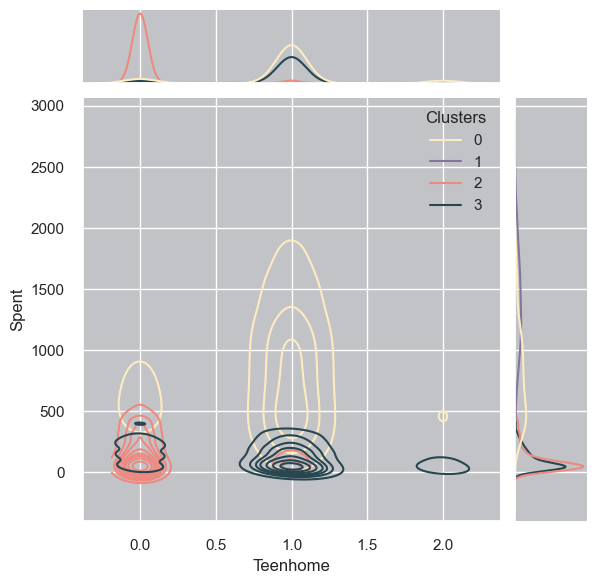

<Figure size 800x550 with 0 Axes>

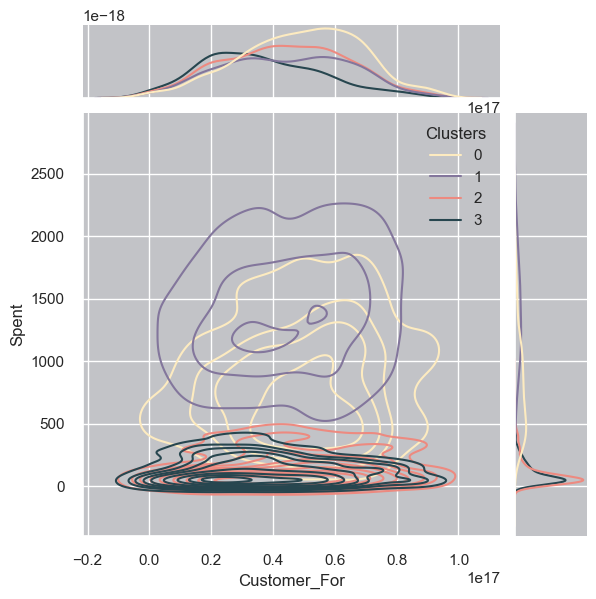

<Figure size 800x550 with 0 Axes>

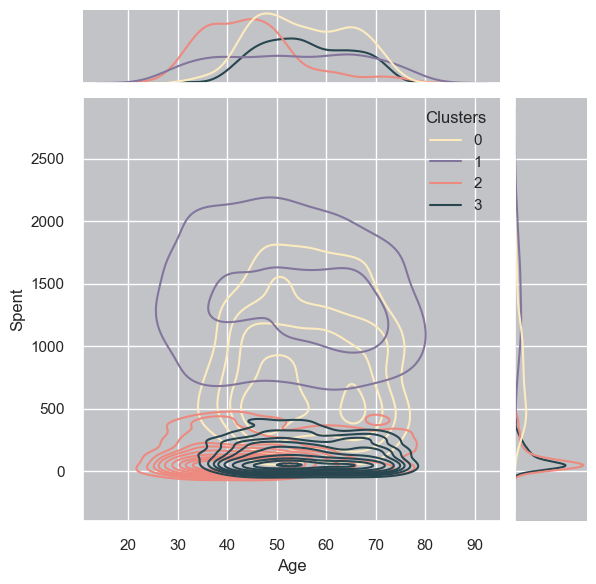

<Figure size 800x550 with 0 Axes>

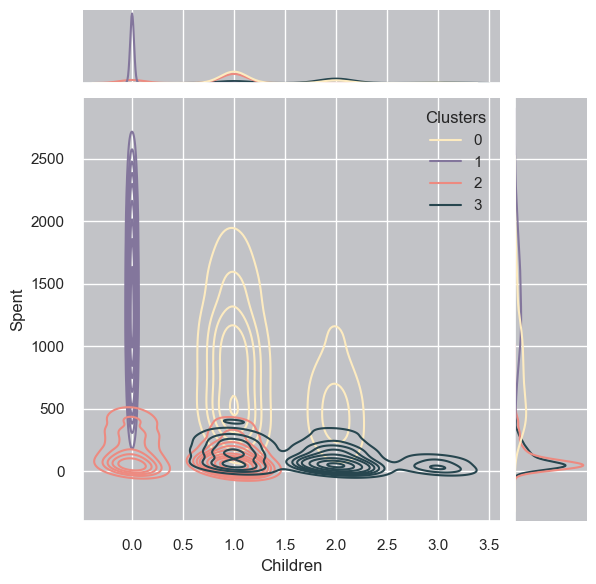

<Figure size 800x550 with 0 Axes>

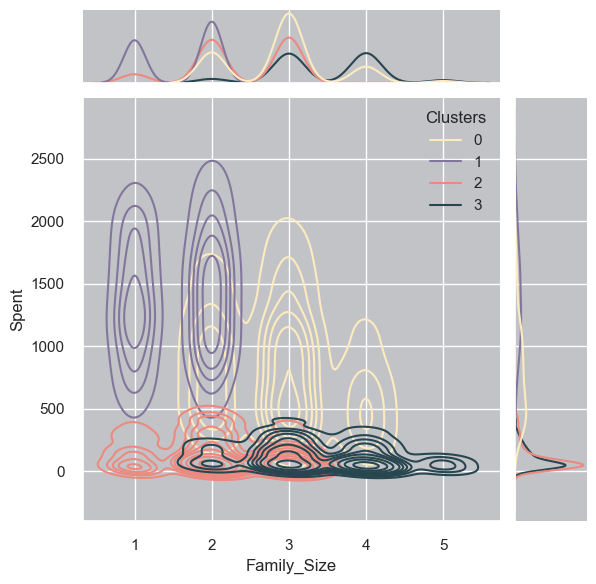

<Figure size 800x550 with 0 Axes>

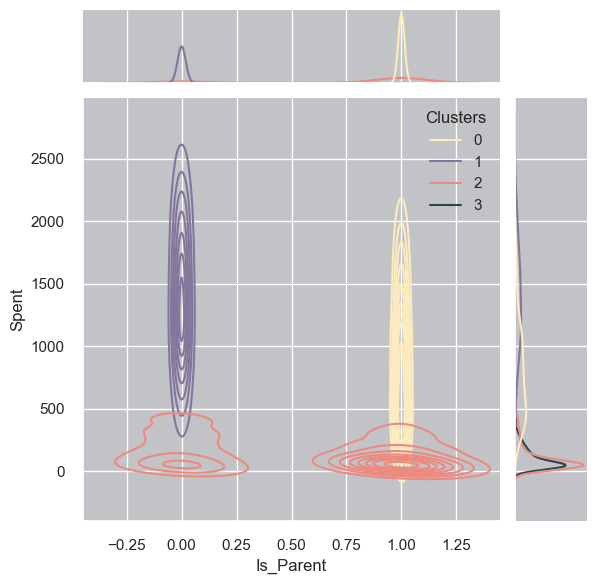

<Figure size 800x550 with 0 Axes>

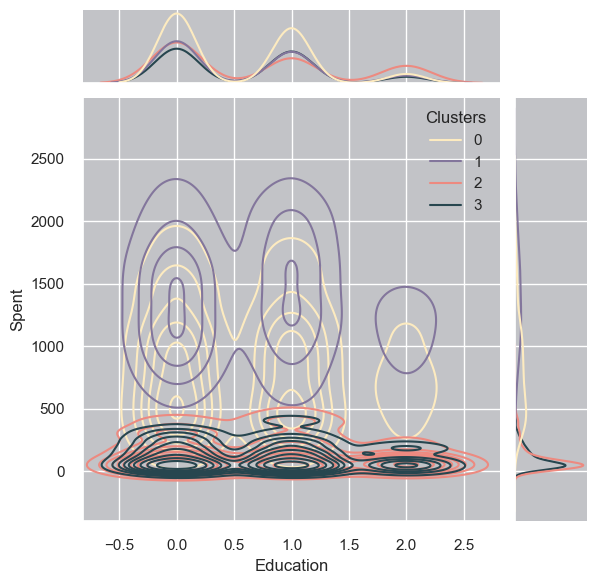

<Figure size 800x550 with 0 Axes>

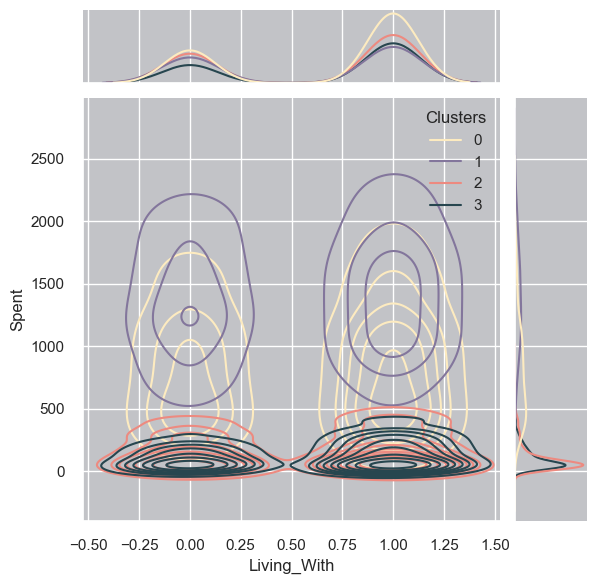

In [41]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i],y=data['Spent'],hue=data['Clusters'],kind='kde',palette=pal)
    plt.show()

**Points to be noted:**

The folloing iformation can be deduced about the customers i different clusters.

**About Cluster Number 0**

~Are definitely a parent

~At the max have 4 memebers in the family and at the least 2

~Single Parents are a subset of this group

~Most have a teenager at home

~Relatively Older

**About Cluster Number 1**

~Are not parents

~At the max have 2 members in the family

~High income group

~Span all ages

~A slight majority of couples over single people

**About Cluster Number 2**

~Majority of these people are parents

~At the max there are 3 members in the family

~The majority have one kid (and not teenagers, typically)

~Relatively younger

**About Cluster Number 3**

~They are definitely a parent

~At the max are 5 members in the family and at least 2

~Majority of them have a teenager at home

~Relatively older

~A lower-income group

# CONCLUSION #

In this project, I perfomed unsupervised clustering. I did use dimensionality reduction followed by agglomerative clustering. I came up with 4 clusters and further used them in profiling  customers in clusters according to their family structures and income/spending. This can be used in planning better marketing strategies